In [1]:
!pip install nltk gensim

In [2]:
import re

In [3]:
import nltk
from nltk import download
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')

from pymystem3 import Mystem
stem = Mystem()

from gensim.corpora import Dictionary
import gensim

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Предобработка текста**

In [96]:
new_stopwords = ['AI','intelligence', 'mit', 'MIT', 'robots', 'machine', 'learning', 'computer', 'model', 'datum', 'make','say', 'use',
                 'one', 'system', 'work', 'technology', 'take', 'news', 'fox', 'n', 'making', 'ai', 'artificial','robot','robotic','q',
                 'says','could', 'models','data', 'may', 'using','computing']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
stop_words = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
stop_words = set(stop_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
super_stop_words = stop_words.union(new_stopwords)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
super_stop_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'AI',
 'MIT',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ai',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'artificial',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'computer',
 'computing',
 'could',
 'couldn',
 "couldn't",
 'd',
 'data',
 'datum',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'fox',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'intelligence',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'learning',
 'll',
 'm',
 'ma',
 'machine',
 'make',
 'making',
 'may',
 'me',
 'mightn',
 "mightn't",
 'mit',
 'model',
 'models',
 'more',
 'most',
 'mustn',
 "mus

In [101]:
def preprocessing(text):
    text = text.lower()
    text = re.sub('\n', ' ', text)
    text = stem.lemmatize(text)
    text = re.sub(r'\W', ' ', str(text)).split()
    text = [word for word in text if word not in super_stop_words and word[0].isalpha()]
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
data = pd.read_csv('AI_data_headers.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,headline
0,MIT-Takeda Program wraps up with 16 publicatio...
1,Researchers leverage shadows to model 3D scene...
2,Understanding the visual knowledge of language...
3,A smarter way to streamline drug discovery
4,Technique improves the reasoning capabilities ...


In [103]:
data['preprocessed_headlines'] = data['headline'].apply(preprocessing)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,headline,preprocessed_headlines
0,MIT-Takeda Program wraps up with 16 publicatio...,"[takeda, program, wraps, publications, patent,..."
1,Researchers leverage shadows to model 3D scene...,"[researchers, leverage, shadows, scenes, inclu..."
2,Understanding the visual knowledge of language...,"[understanding, visual, knowledge, language]"
3,A smarter way to streamline drug discovery,"[smarter, way, streamline, drug, discovery]"
4,Technique improves the reasoning capabilities ...,"[technique, improves, reasoning, capabilities,..."
...,...,...
1774,Uber will know if you're drunk before you even...,"[uber, know, drunk, even, get, car]"
1775,IBM computer taps AI to successfully debate hu...,"[ibm, taps, successfully, debate, humans]"
1776,Gen. Anthony Tata: One more reason to beware o...,"[gen, anthony, tata, reason, beware, emerging,..."
1777,Researchers create a video game Mario that thi...,"[researchers, create, video, game, mario, thinks]"


In [105]:
token_text = data['preprocessed_headlines'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
from gensim import corpora

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
dictionary = corpora.Dictionary(token_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
print(dictionary)

Dictionary<3795 unique tokens: ['completed', 'dozen', 'nearly', 'patent', 'program']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
print(dictionary.token2id)

{'completed': 0, 'dozen': 1, 'nearly': 2, 'patent': 3, 'program': 4, 'projects': 5, 'publications': 6, 'takeda': 7, 'two': 8, 'wraps': 9, 'blocked': 10, 'including': 11, 'leverage': 12, 'objects': 13, 'researchers': 14, 'scenes': 15, 'shadows': 16, 'view': 17, 'knowledge': 18, 'language': 19, 'understanding': 20, 'visual': 21, 'discovery': 22, 'drug': 23, 'smarter': 24, 'streamline': 25, 'way': 26, 'capabilities': 27, 'improves': 28, 'large': 29, 'reasoning': 30, 'technique': 31, 'creation': 32, 'immersive': 33, 'story': 34, 'told': 35, 'crisis': 36, 'diagnosis': 37, 'health': 38, 'highlights': 39, 'mental': 40, 'methods': 41, 'novel': 42, 'scale': 43, 'symposium': 44, 'treatment': 45, 'help': 46, 'navigate': 47, 'climate': 48, 'decision': 49, 'local': 50, 'makers': 51, 'relevant': 52, 'algorithm': 53, 'discovers': 54, 'new': 55, 'videos': 56, 'watching': 57, 'electronic': 58, 'helps': 59, 'materials': 60, 'method': 61, 'screening': 62, 'speed': 63, 'vision': 64, 'approach': 65, 'bette

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
corpus = [dictionary.doc2bow(text) for text in token_text]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**LDA**

In [113]:
lda = gensim.models.LdaMulticore(corpus,
                                 num_topics = 5,
                                 id2word=dictionary,
                                 passes=20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
lda.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"human" + 0.008*"better" + 0.008*"future" + 0.008*"study" + 0.007*"predict" + 0.005*"google" + 0.005*"building" + 0.005*"elon" + 0.005*"cancer" + 0.005*"musk"'),
 (1,
  '0.020*"new" + 0.005*"help" + 0.005*"generative" + 0.004*"drug" + 0.004*"lab" + 0.004*"google" + 0.004*"energy" + 0.004*"science" + 0.003*"development" + 0.003*"discovery"'),
 (2,
  '0.008*"new" + 0.006*"helps" + 0.005*"algorithm" + 0.005*"google" + 0.004*"humans" + 0.004*"research" + 0.003*"human" + 0.003*"like" + 0.003*"objects" + 0.003*"networks"'),
 (3,
  '0.013*"new" + 0.012*"researchers" + 0.009*"world" + 0.009*"future" + 0.005*"tech" + 0.004*"help" + 0.003*"medical" + 0.003*"students" + 0.003*"technique" + 0.003*"health"'),
 (4,
  '0.011*"us" + 0.010*"new" + 0.008*"like" + 0.005*"help" + 0.005*"brain" + 0.005*"global" + 0.005*"health" + 0.005*"google" + 0.005*"humans" + 0.004*"big"')]

In [115]:
!pip install pyldavis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
topic = gensimvis.prepare(lda, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.155910  0.001162       1        1  21.369157
4     -0.047279  0.103906       2        1  21.036907
1     -0.053970 -0.094039       3        1  20.153541
3     -0.022242 -0.068920       4        1  18.985163
2     -0.032419  0.057890       5        1  18.455232, topic_info=            Term       Freq      Total Category  logprob  loglift
863           us  22.000000  22.000000  Default  30.0000  30.0000
14   researchers  27.000000  27.000000  Default  29.0000  29.0000
55           new  96.000000  96.000000  Default  28.0000  28.0000
230        study  18.000000  18.000000  Default  27.0000  27.0000
654      predict  15.000000  15.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
165     teaching   3.663746   9.950860   Topic5  -6.1596   0.6906
66        better   4.188073  25.046030   Topic5  -6.0259  -0.0987
191         deep   3.705062  20.005986   Topic5  -6.1484   0.0035
91   engineering   3.663630  11.391173   Topic5  -6.1597   0.5554
309        solve   3.661855  10.678795   Topic5  -6.1601   0.6195

[333 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
280       4  0.705659  accelerates
1161      4  0.847114     advances
196       2  0.837946    advancing
291       4  0.202667          age
291       5  0.810666          age
...     ...       ...          ...
287       5  0.149717        world
643       1  0.696100      writing
2903      3  0.701832          x80
834       1  0.402851         year
834       5  0.604276         year

[554 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

**LSA**

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import TruncatedSVD


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
n_features = 1000
n_components = 10
n_top_words = 20

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
data = pd.read_csv("AI_data_headers.csv")
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,headline
0,MIT-Takeda Program wraps up with 16 publicatio...
1,Researchers leverage shadows to model 3D scene...
2,Understanding the visual knowledge of language...
3,A smarter way to streamline drug discovery
4,Technique improves the reasoning capabilities ...


In [124]:
headers = data['headline'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
super_stop_words_list = list(super_stop_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
vectorizer = CountVectorizer(max_features=n_features, stop_words = super_stop_words_list)

X_word = vectorizer.fit_transform(headers)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
display(X_word.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1779, 1000)

In [130]:
feature_names = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
feature_names[100:120]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['boom', 'boost', 'boosts', 'bot', 'bots', 'box', 'brain', 'brains',
       'break', 'breakthrough', 'breast', 'breazeal', 'bring', 'bringing',
       'brings', 'britain', 'build', 'building', 'builds', 'business'],
      dtype=object)

In [132]:
lsa_model = TruncatedSVD(n_components=n_components, n_iter=10)

lsa_topic_matrix = lsa_model.fit_transform(X_word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
lsa_topic_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1779, 10)

In [141]:
def draft_top_words(model, feature_names, n_top_words, title):

    fig, axes = plt.subplots(1, 5, figsize=(50, 15))
    axes = axes.flatten()
    all_features = {}

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: index 5 is out of bounds for axis 0 with size 5

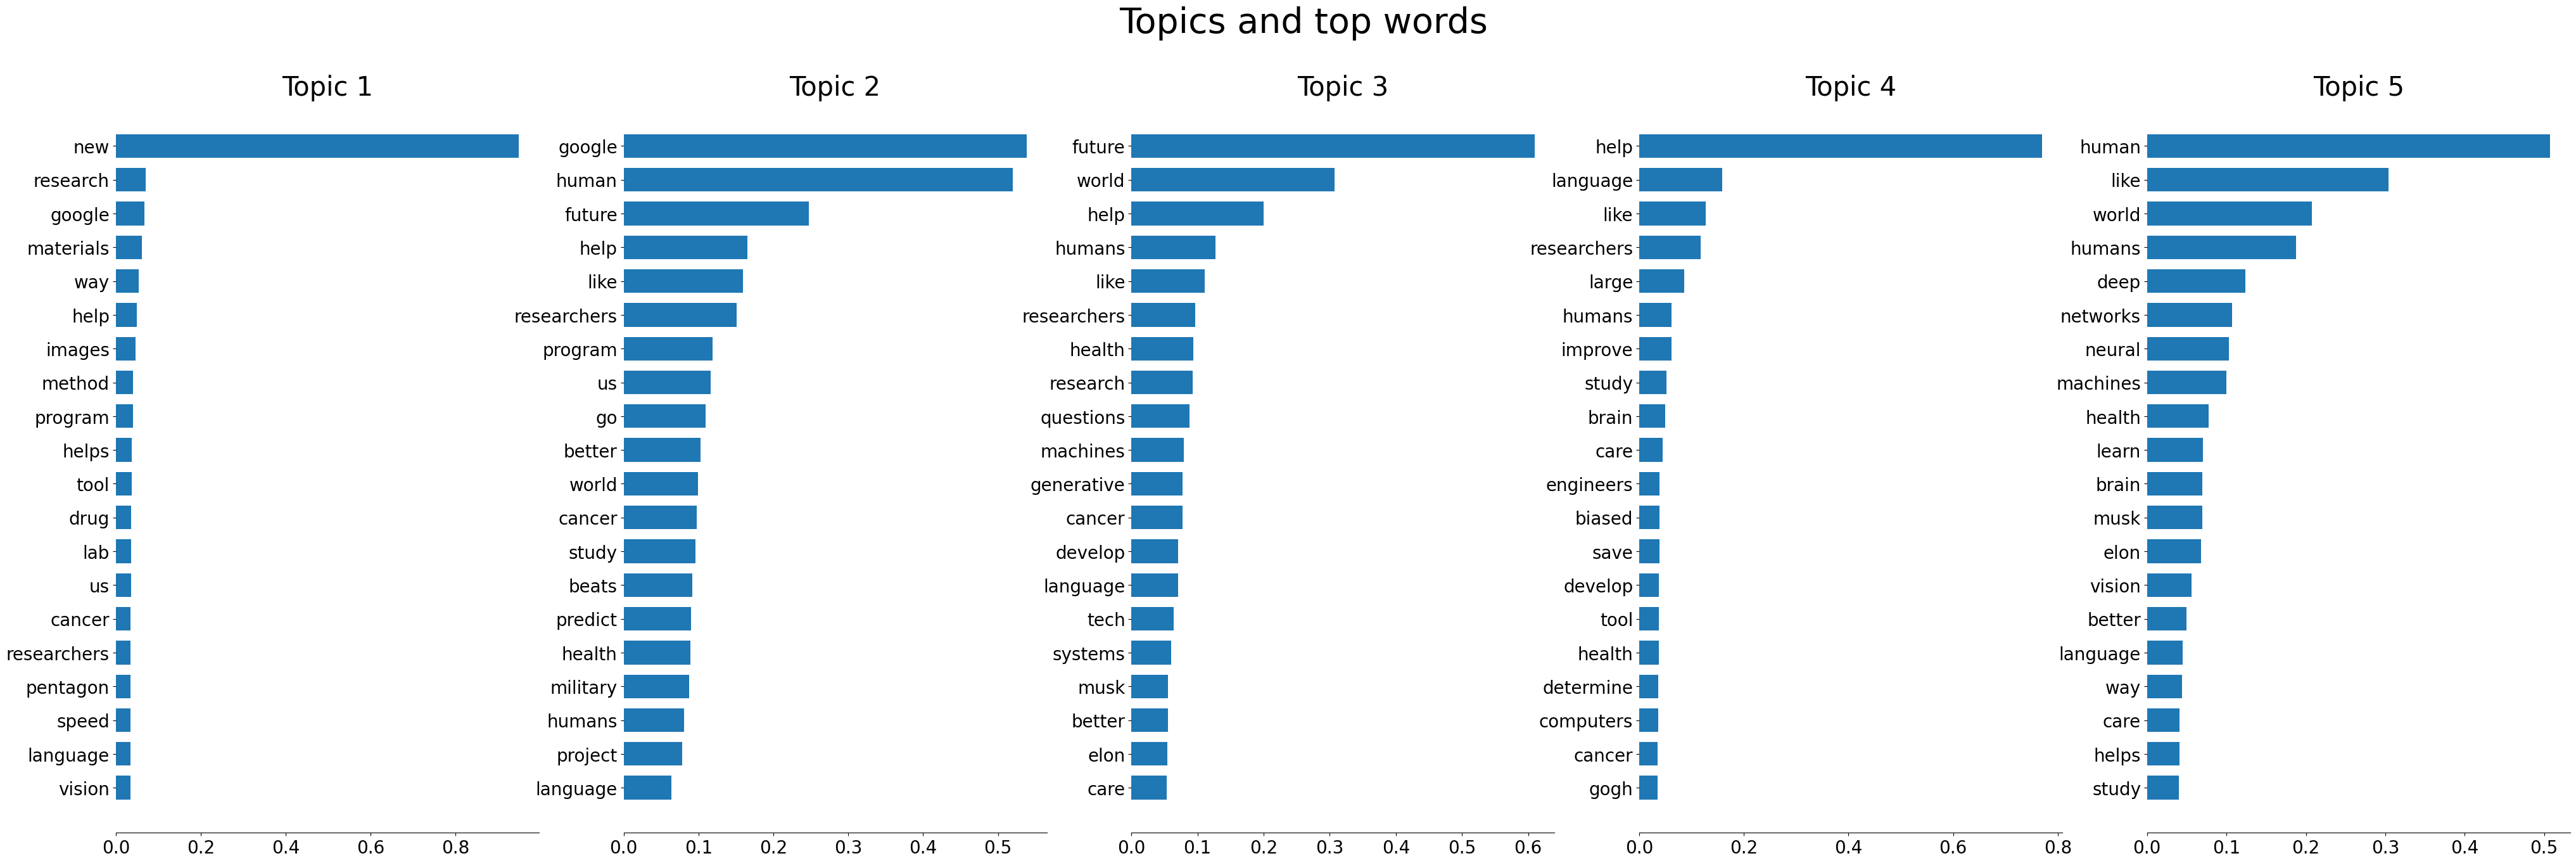

In [142]:
draft_top_words(lsa_model, feature_names, n_top_words, 'Topics and top words')

In [145]:
def draft_top_words(model, feature_names, n_top_words, title):

    fig, axes = plt.subplots(1, 3, figsize=(50, 15))
    axes = axes.flatten()
    all_features = {}

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: index 3 is out of bounds for axis 0 with size 3

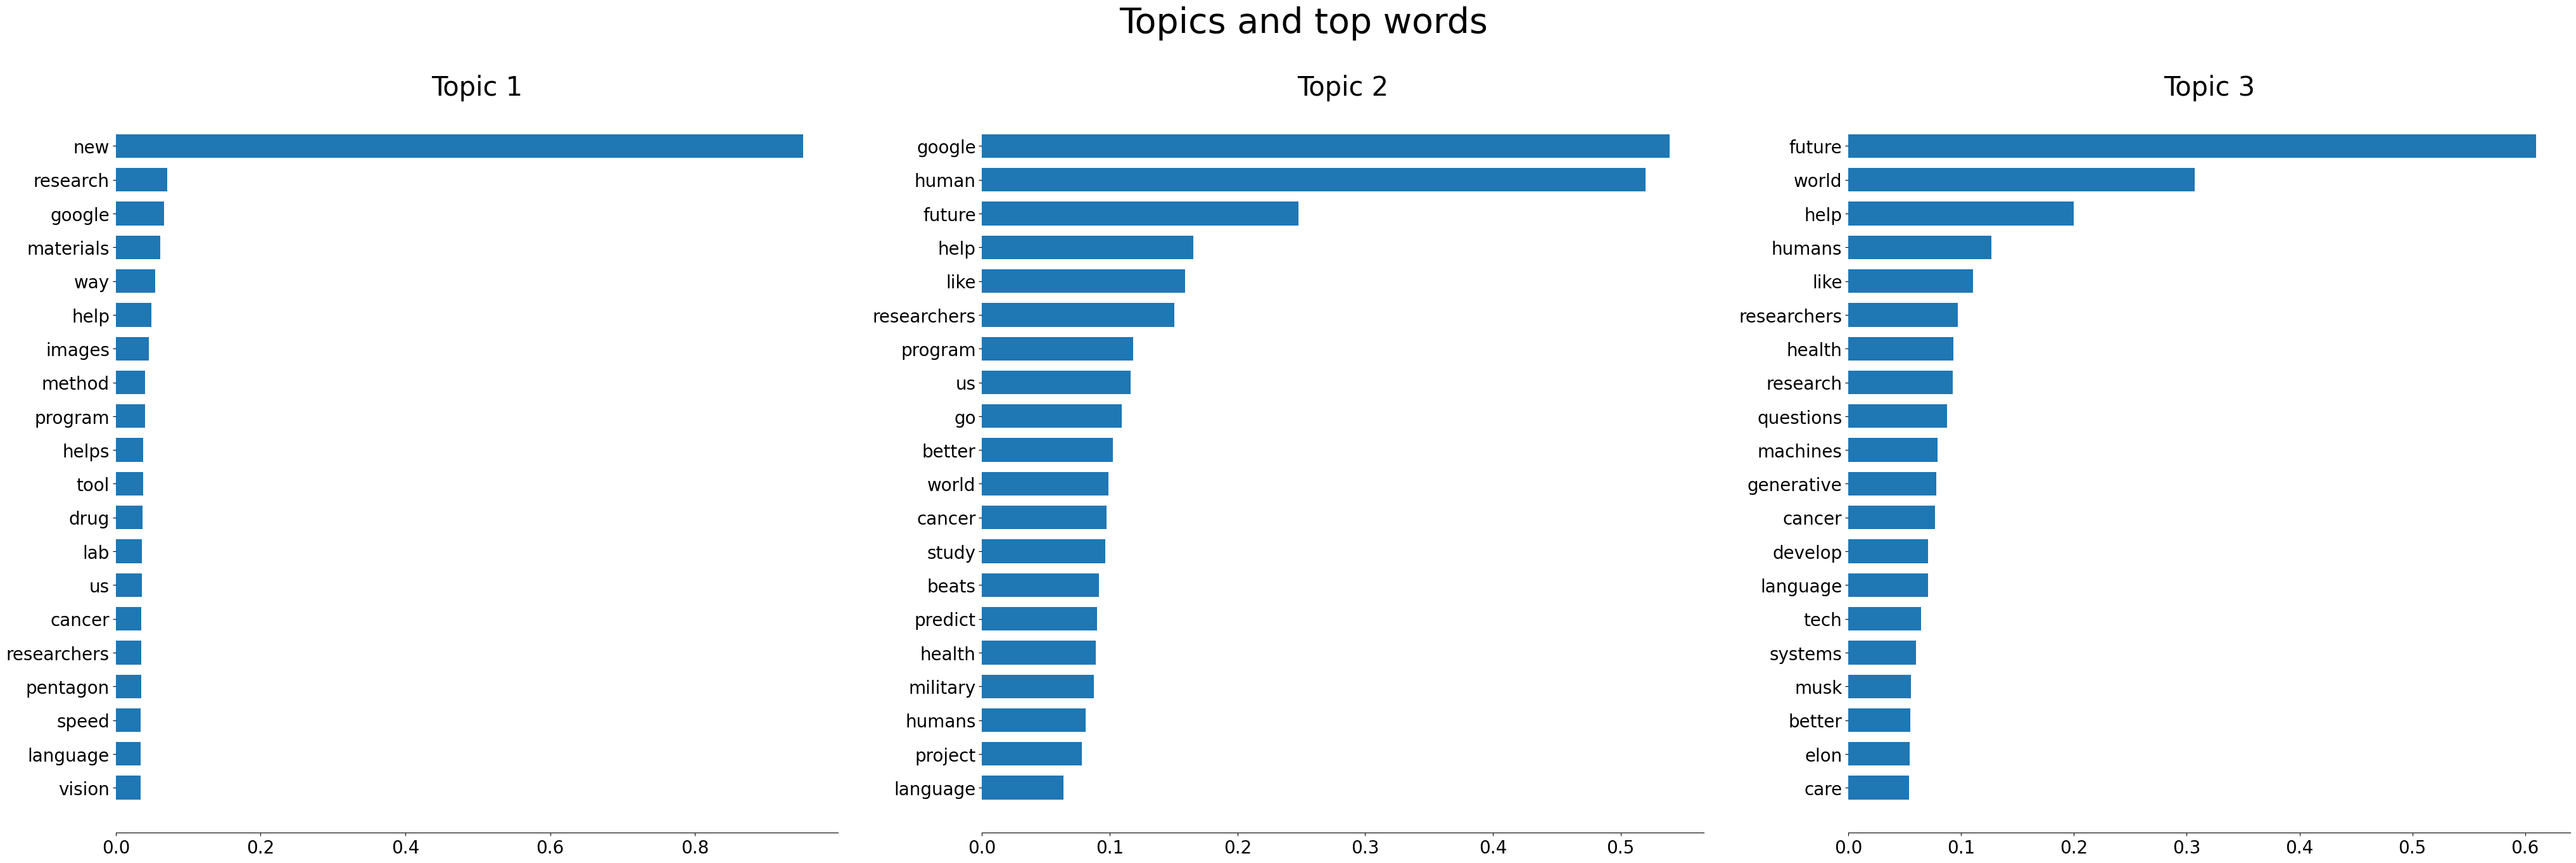

In [146]:
draft_top_words(lsa_model, feature_names, n_top_words, 'Topics and top words')